### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import and Exploration of dataset

In [2]:
data = pd.read_csv('../TP/datasets/alzheimers_disease_data.csv')

In [3]:
# Definição do nº máximo de colunas a exibir
pd.set_option('display.max_columns', None)

In [4]:
# Resultados(nº de linhas)
data.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [5]:
# Linhas,Colunas
data.shape

(2149, 35)

**Goal: Predict whether or not the patient has Alzheimer's**

In [6]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [7]:
# Vou remover as colunas que não têm impacto no diagnóstico
data = data [['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis']]
# Removi por enquanto 'PatientID', 'DoctorInCharge'

In [8]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [9]:
# Detect missing values.
data.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'EducationLevel'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking'}>],
       [<Axes: title={'center': 'AlcoholConsumption'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'DietQuality'}>,
        <Axes: title={'center': 'SleepQuality'}>,
        <Axes: title={'center': 'FamilyHistoryAlzheimers'}>,
        <Axes: title={'center': 'CardiovascularDisease'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'HeadInjury'}>,
        <Axes: title={'center': 'Hypertension'}>,
        <Axes: title={'center': 'SystolicBP'}>,
        <Axes: title={'center': 'DiastolicBP'}>],
       [<Axes: title={'center': 'CholesterolTotal'}>,
        <Axes: title={'center': 'CholesterolLDL'}>,
   

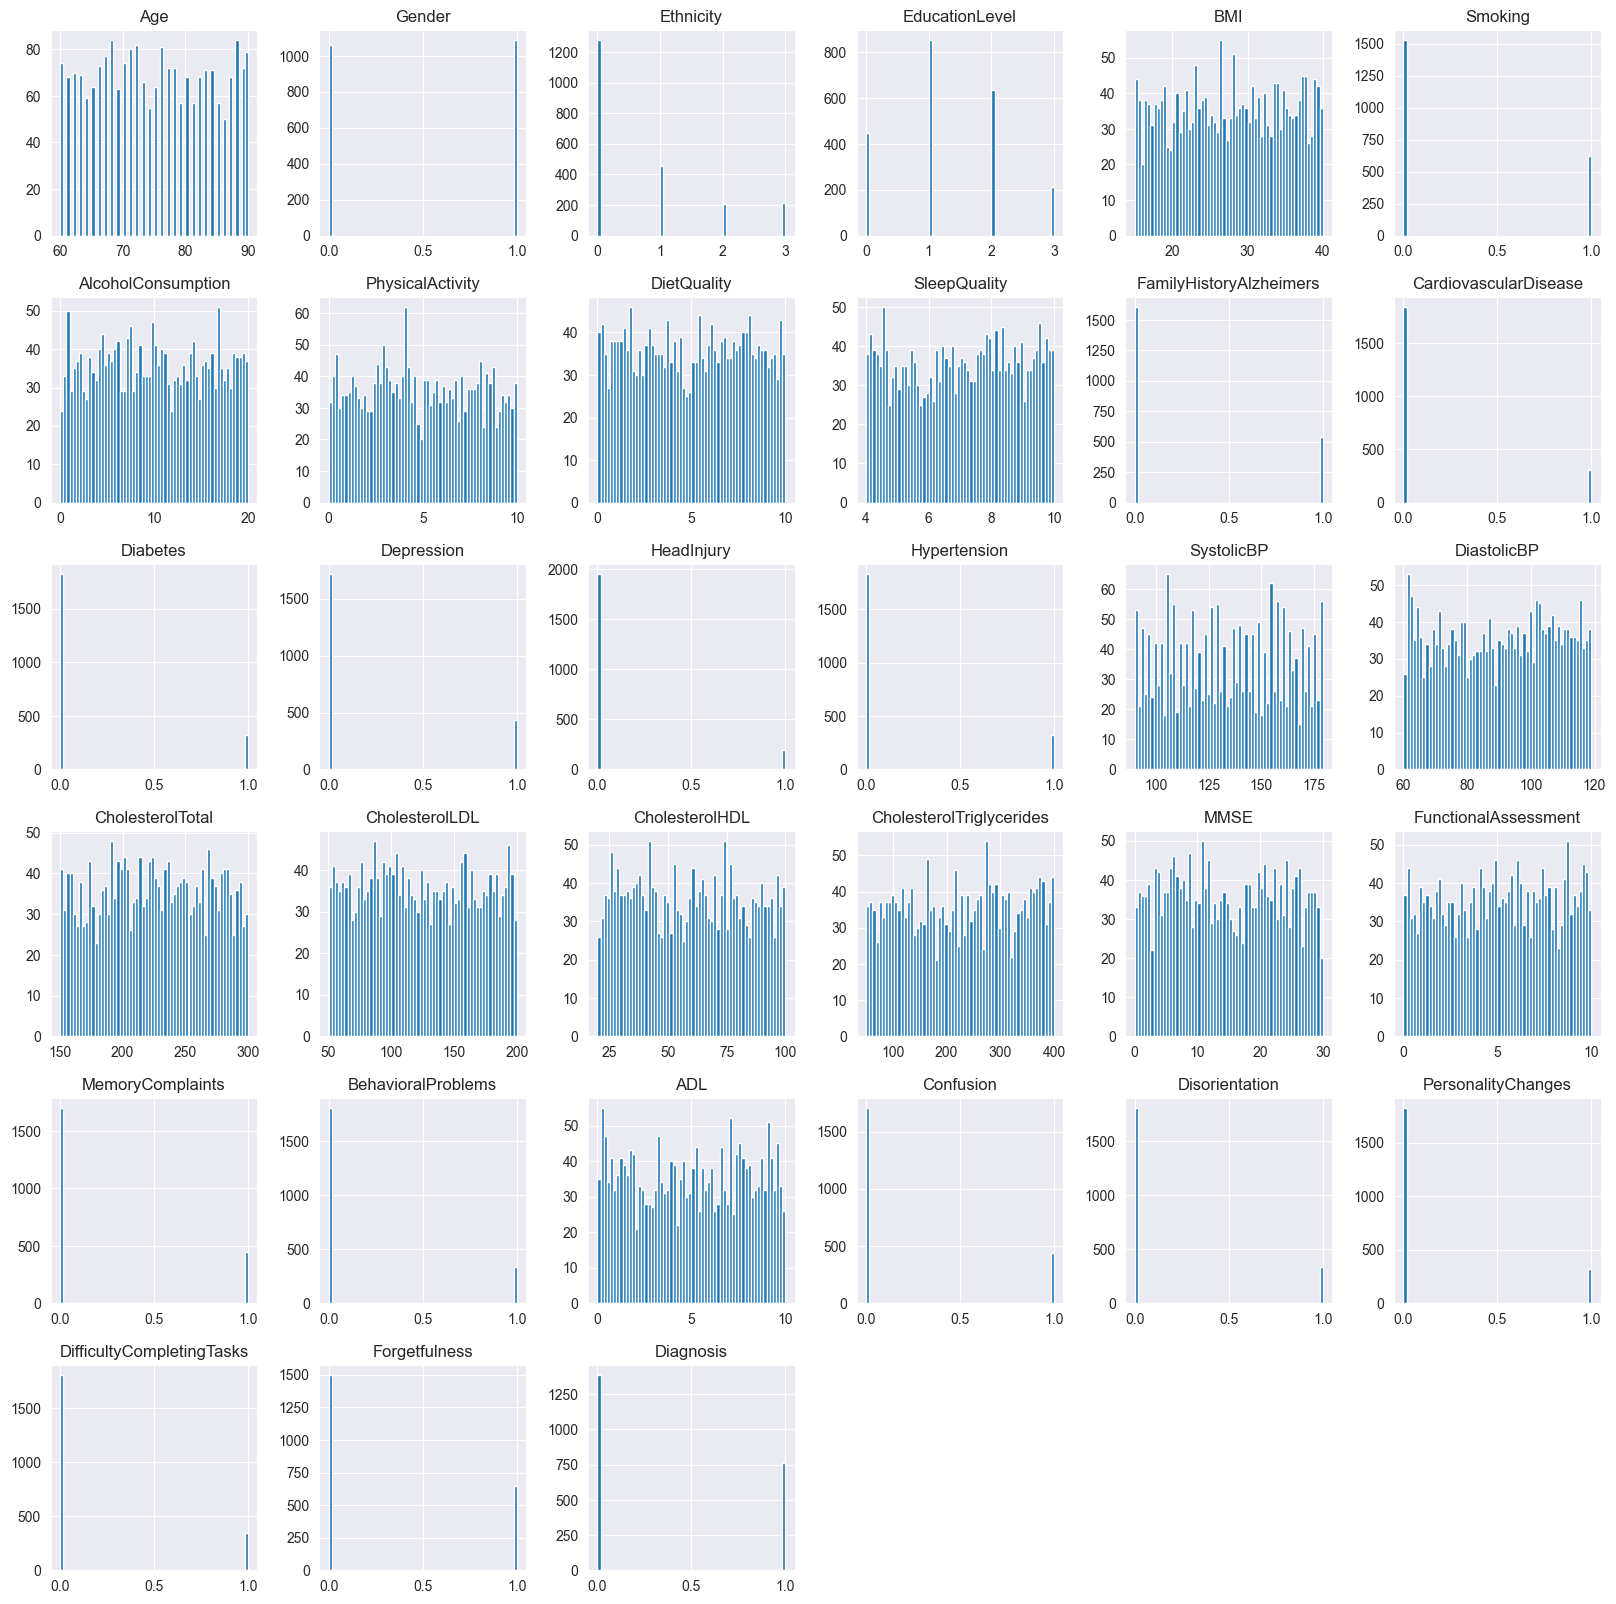

In [10]:
# Representation of the distribution of data.
data.hist(bins=60, figsize=(20, 20))

In [11]:
# Returns a Series with the data type of each column
data.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [12]:
# No issues detected with categorical values

In [13]:
# Detect missing values
data.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

**Statistical description of the dataset**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


**Correlation Analysis**

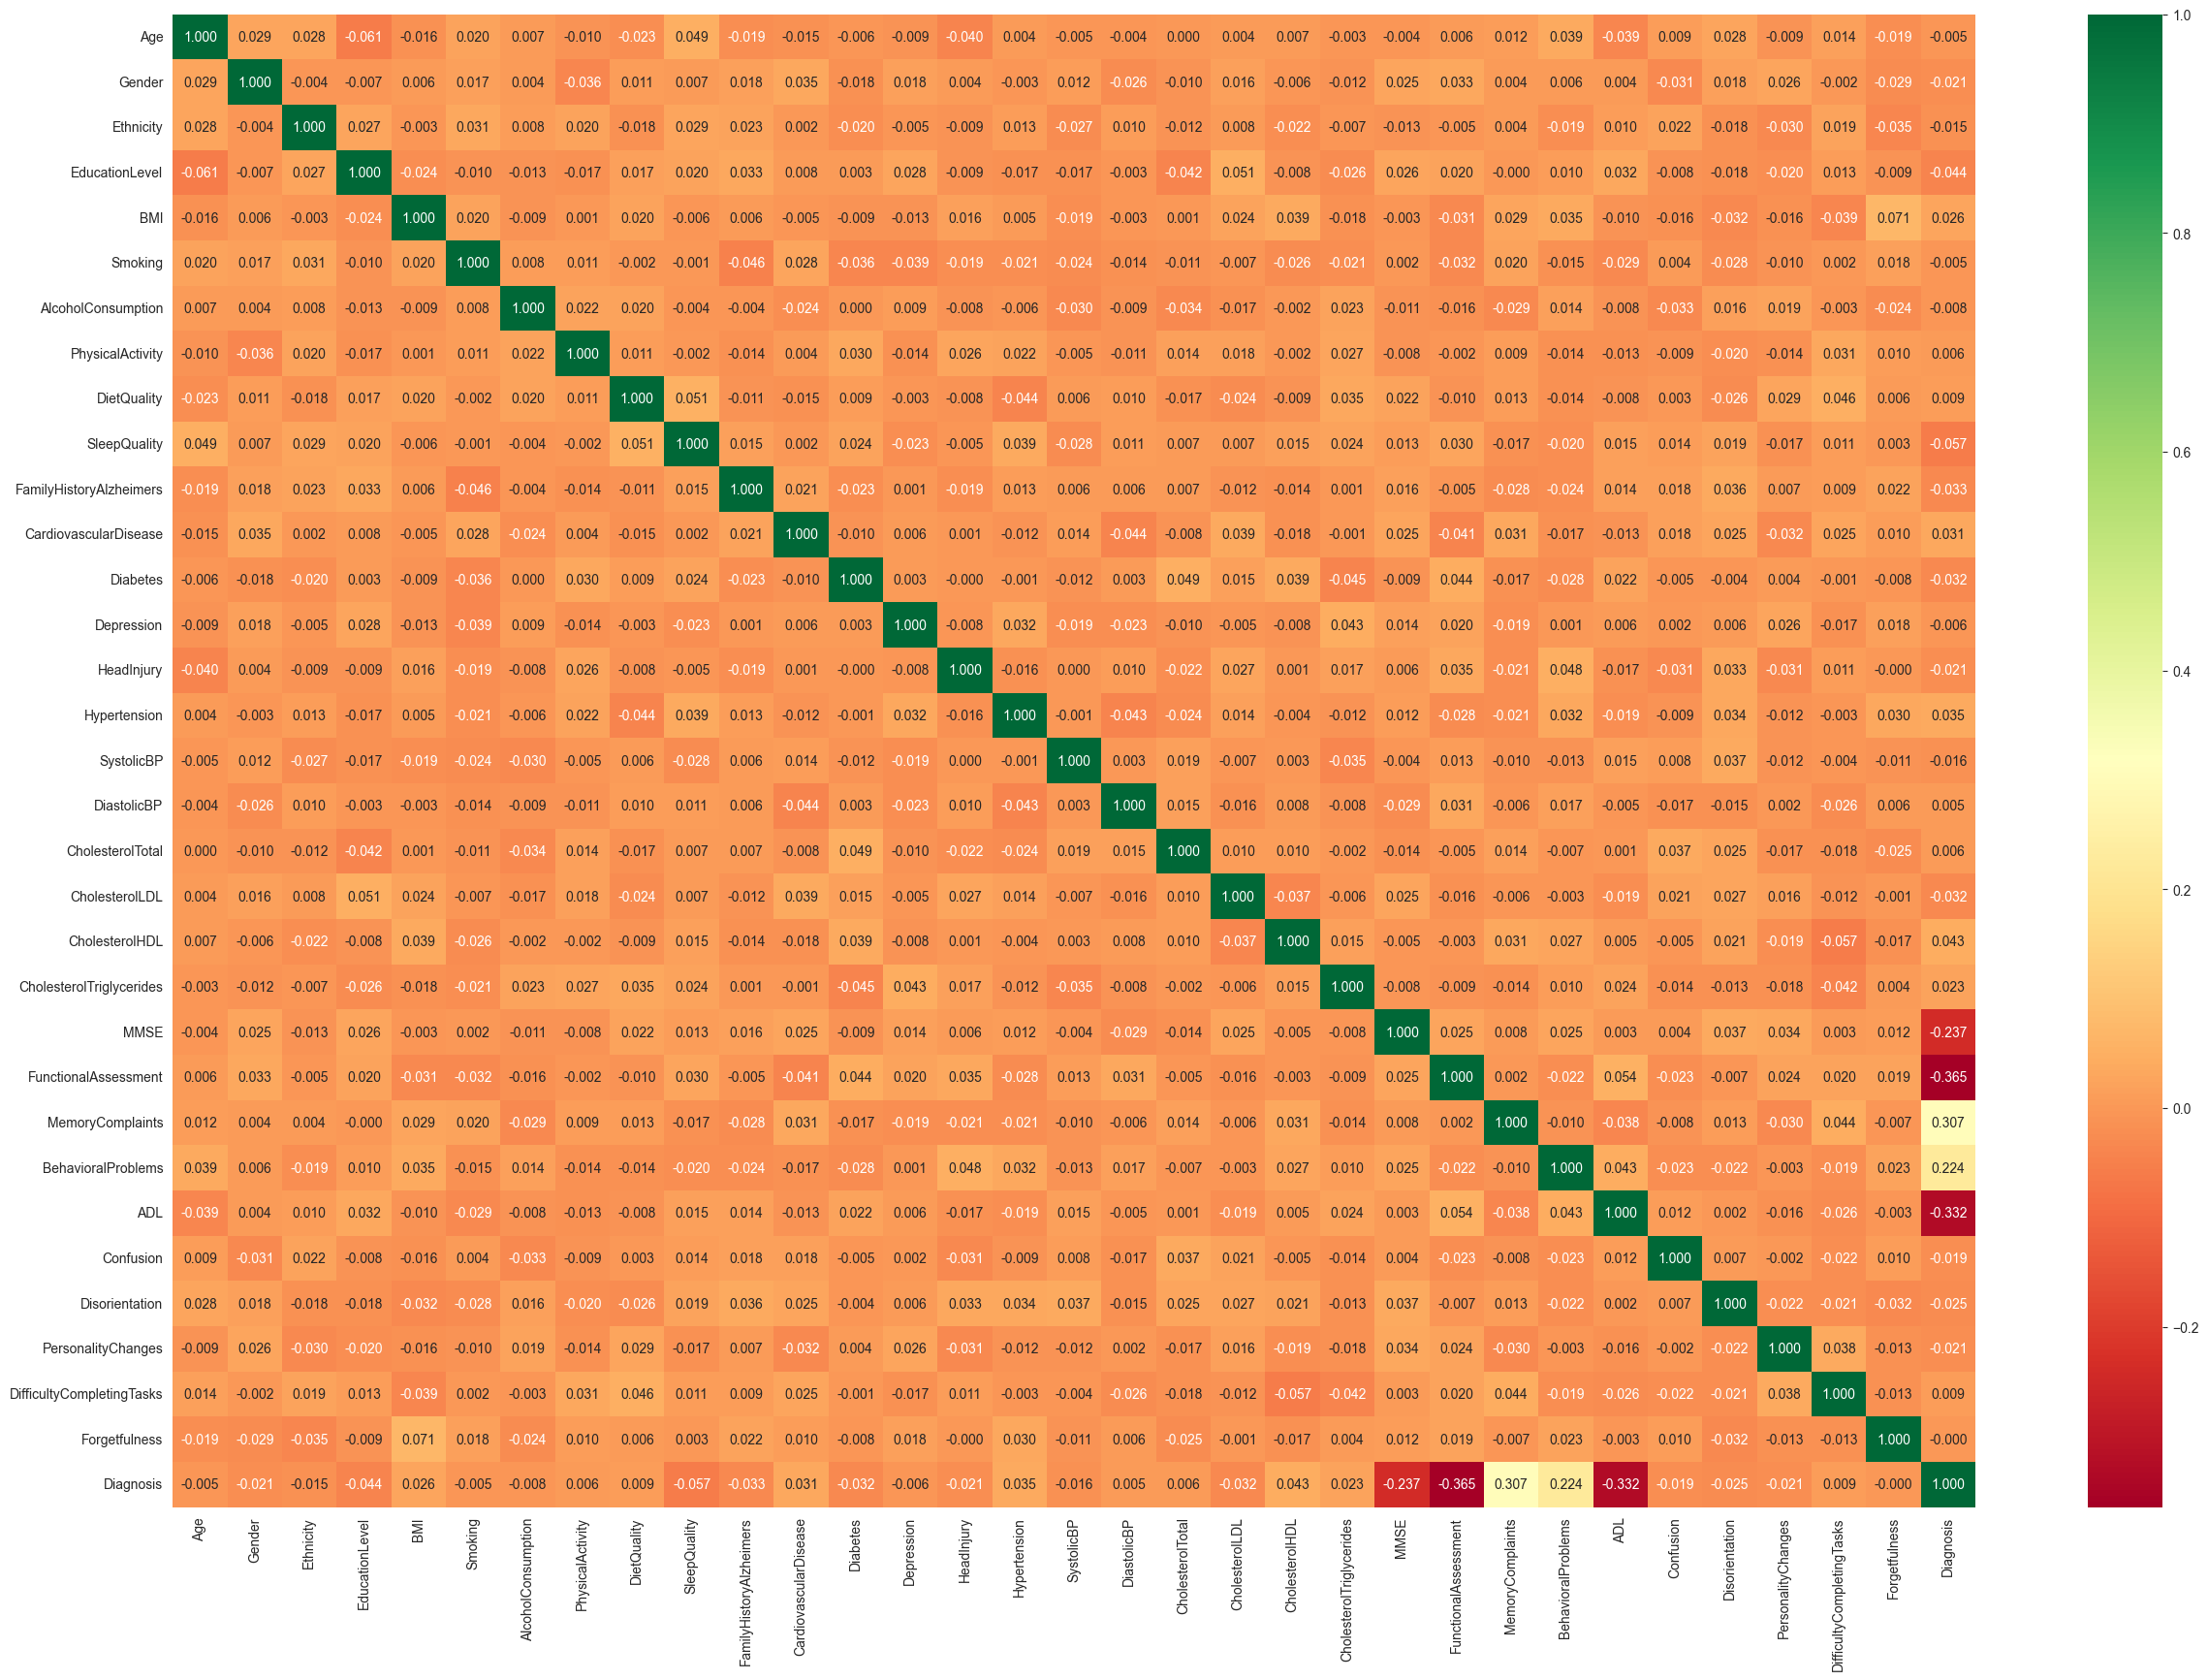

In [15]:
# Plotar a matriz de correlação
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='RdYlGn')
plt.show()

#### Analysis of important characteristics.(Feature Selection)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [17]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
importances = model.feature_importances_
features = X.columns

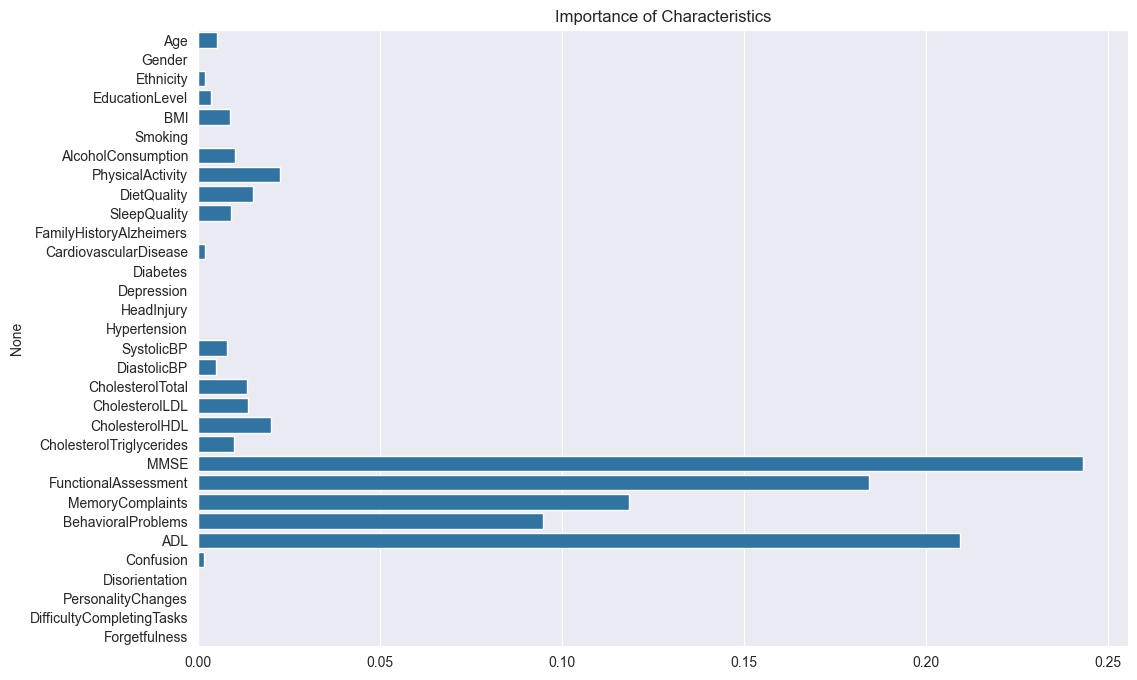

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title('Importance of Characteristics')
plt.show()

### 3. Training with selected variables

In [20]:
# Most important features
selected_features = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL'] 

# Split the data using selected variables
X_selected = data[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [21]:
# Training the model again with the new selected features
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4. Model Evaluation

**Predictions on the Test Set**

In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[254  23]
 [ 23 130]]


#### Misclassification

In [24]:
# Calcular a taxa de erro
misclassification = 1 - model.score(X_test, y_test)
print("Misclassification Rate:", misclassification)

Misclassification Rate: 0.10697674418604652


#### Mean per Class Error

In [25]:
# Calcular o erro médio por classe
mean_per_class_error = conf_matrix.sum(axis=1) - np.diag(conf_matrix) / conf_matrix.sum(axis=1)
print("Mean Per Class Error:", mean_per_class_error.mean())

Mean Per Class Error: 214.11667964418018


#### Logloss

In [26]:
from sklearn.metrics import log_loss

# Calcular o logloss
logloss = log_loss(y_test, y_prob)
print("Logloss:", logloss)

Logloss: 3.855832688138114


#### MSE – Mean Squared Error

In [27]:
from sklearn.metrics import mean_squared_error

# Calcular o mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.10697674418604651


#### Accuracy, Precision, Recall, F-measure (F1 Score)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular a precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calcular o recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calcular o F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.8930232558139535
Precision: 0.8930232558139535
Recall: 0.8930232558139535
F1 Score: 0.8930232558139535


#### Receiver Operating Characteristic – ROC

ROC AUC Score: 0.883320355819825


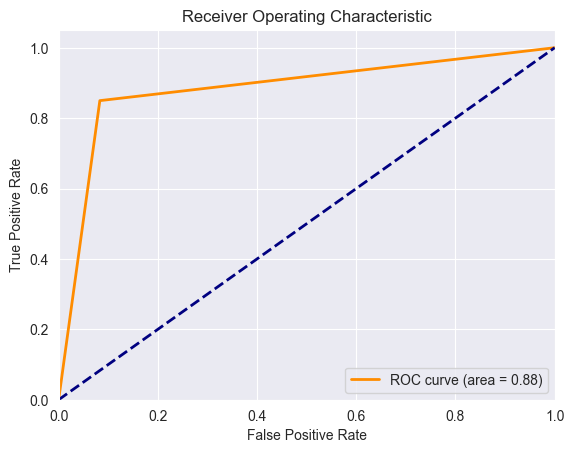

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular o ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 5. Training with Hyperparameter Tuning with GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

### 6. Model Evaluation (2)

**Predictions on the Test Set**

In [31]:
# Melhor estimador
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train) # voltamos a treinar o modelo 

y_pred_dt = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

#### Confusion Matrix

In [32]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[271   6]
 [ 21 132]]


#### Misclassification

In [33]:
misclassification = 1 - accuracy_score(y_test, y_pred_dt)
print("Misclassification:", misclassification)

Misclassification: 0.06279069767441858


#### Mean per Class Error

In [34]:
mean_per_class_error = 1 - np.mean(np.diag(conf_matrix) / np.sum(conf_matrix, axis=1))
print("Mean per class error:", mean_per_class_error)

Mean per class error: 0.07945777589013936


#### Logloss

In [35]:
logloss = log_loss(y_test, y_pred_prob)
print("Logloss:", logloss)

Logloss: 0.9604294249181947


#### MSE – Mean Squared Error

In [36]:
mse = mean_squared_error(y_test, y_pred_prob)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05654401127809255


#### Accuracy, Precision, Recall, F-measure (F1 Score)

In [37]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_dt)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score:", f1)

Accuracy: 0.9372093023255814
Precision: 0.9565217391304348
Recall: 0.8627450980392157
F1 Score: 0.9072164948453608


#### Receiver Operating Characteristic – ROC

ROC AUC Score: 0.9509921898964159


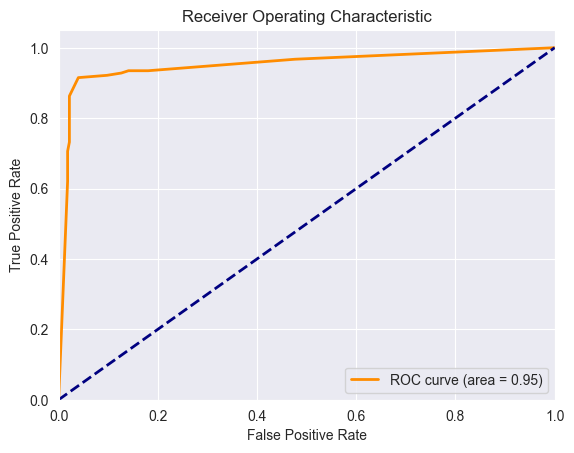

In [38]:
# Receiver Operating Characteristic (ROC)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 7. Export Decision Tree Rules and Convert to Prolog

In [39]:
from sklearn.tree import export_text

# Exportar as regras da árvore de decisão
tree_rules = export_text(best_model, feature_names=selected_features)
print(tree_rules)

# Guardar as regras em um ficheiro txt
with open("rules.txt", "w+") as f:
    f.write(tree_rules)

print("Regras da árvore de decisão exportadas para rules.txt")

|--- FunctionalAssessment <= 5.00
|   |--- ADL <= 4.68
|   |   |--- MMSE <= 24.02
|   |   |   |--- MMSE <= 0.47
|   |   |   |   |--- class: 1
|   |   |   |--- MMSE >  0.47
|   |   |   |   |--- FunctionalAssessment <= 0.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- FunctionalAssessment >  0.07
|   |   |   |   |   |--- MemoryComplaints <= 0.50
|   |   |   |   |   |   |--- FunctionalAssessment <= 2.77
|   |   |   |   |   |   |   |--- MMSE <= 2.03
|   |   |   |   |   |   |   |   |--- MMSE <= 1.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- MMSE >  1.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- MMSE >  2.03
|   |   |   |   |   |   |   |   |--- MMSE <= 10.22
|   |   |   |   |   |   |   |   |   |--- MMSE <= 9.77
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- MMSE >  9.77
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |  

In [40]:
def convert_rule_to_prolog(lines):
    prolog_rules = []
    stack = []

    for line in lines:
        if 'class:' in line:
            indent = line.index('class:')
            class_value = line.split('class:')[1].strip()
            stack.append((indent, f"class({class_value})"))
            conditions = [condition for (level, condition) in stack]
            # Remove '---' and replace '<=' with '=<'
            conditions_str = ", ".join([cond.replace('---', '').strip() for cond in conditions[:-1]])
            prolog_rule = f"diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, {class_value}) :- {conditions_str}."
            prolog_rules.append(prolog_rule)
            stack.pop()
        else:
            parts = line.split('|')
            indent = len(parts) - 1
            condition = parts[-1].strip().replace('<=', '=<').replace('>', '>')
            while stack and stack[-1][0] >= indent:
                stack.pop()
            stack.append((indent, condition))

    return prolog_rules

# Convertendo as regras de árvore para Prolog
prolog_rules = convert_rule_to_prolog(tree_rules.split('\n'))

# Salvando as regras em um arquivo Prolog
with open('rules.pl', 'w+') as file:
    for rule in prolog_rules:
        file.write(rule + '\n')

# Imprimindo as regras Prolog geradas
for rule in prolog_rules:
    print(rule)


diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, 1) :- FunctionalAssessment =< 5.00, ADL =< 4.68, MMSE =< 24.02, MMSE =< 0.47.
diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, 1) :- FunctionalAssessment =< 5.00, ADL =< 4.68, MMSE =< 24.02, MMSE >  0.47, FunctionalAssessment =< 0.07.
diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, 1) :- FunctionalAssessment =< 5.00, ADL =< 4.68, MMSE =< 24.02, MMSE >  0.47, FunctionalAssessment >  0.07, MemoryComplaints =< 0.50, FunctionalAssessment =< 2.77, MMSE =< 2.03, MMSE =< 1.75.
diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, 1) :- FunctionalAssessment =< 5.00, ADL =< 4.68, MMSE =< 24.02, MMSE >  0.47, FunctionalAssessment >  0.07, MemoryComplaints =< 0.50, FunctionalAssessment =< 2.77, MMSE =< 2.03, MMSE >  1.75.
diagnostic(MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, 1) :- FunctionalAsse